In [1]:
import os, shutil
import warnings
warnings.filterwarnings('ignore')


In [2]:
# %pip install -q -U keras-tuner


In [3]:
# os.getcwd()

In [4]:


# original_dataset_dir = '/home/kailash/VScode Python projects/tf/conv/kaggle_dataset/train'


In [5]:

# base_dir = '/home/kailash/VScode Python projects/tf/conv/small_dataset/'

# os.mkdir(base_dir)



### Folders for train,test,validation data ###

In [6]:
# train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


In [7]:
# os.path(test_dir)

### Directory for cat and dog images for train test validation data ###

In [8]:
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

#### Copy from kaggle train dataset to their respective directories ####

In [9]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [10]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [11]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [12]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [13]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [14]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [15]:
import tensorflow as tf

2022-09-20 12:02:55.897394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 12:02:56.237687: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 12:02:57.363438: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/kailash/anaconda3/envs/tensorflow1/lib/
2022-09-20 12:02:57.363591: W tensorflow/stream_executor/platform/default/dso_loa

In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-09-20 12:02:58.864103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 12:02:58.892249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 12:02:58.892431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [17]:
import tensorflow as tf
from tensorflow import keras


In [18]:
import keras_tuner as kt

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),padding = "same",activation="relu",input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3),padding = "same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2022-09-20 12:02:59.406565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 12:02:59.407606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 12:02:59.407834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 12:02:59.407947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [21]:

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,decay=1e-6),metrics=['acc'])

In [22]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory('/home/kailash/VScode Python projects/tf/conv/small_dataset/train',target_size = (150,150),batch_size =40,class_mode ='binary')
valid_generator = test_datagen.flow_from_directory('/home/kailash/VScode Python projects/tf/conv/small_dataset/validation',target_size = (150,150),batch_size =40,class_mode ='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break



data batch shape: (40, 150, 150, 3)
labels batch shape: (40,)


In [24]:
train_dataset = tf.data.Dataset.from_generator(lambda:train_generator, output_types=(tf.float32, tf.float32), 
output_shapes=([40,150,150,3], (40,)))

In [25]:
valid_dataset = tf.data.Dataset.from_generator(lambda:valid_generator, output_types=(tf.float32, tf.float32), 
output_shapes=([40,150,150,3], (40,)))

In [26]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (40, 150, 150, 3)
labels batch shape: (40,)


In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cats_dog",save_best_only=True)

In [28]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [29]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()


In [30]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir, profile_batch='10, 15',histogram_freq=1)

2022-09-20 12:03:01.769752: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-09-20 12:03:01.769851: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-09-20 12:03:01.770510: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2022-09-20 12:03:01.981895: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-09-20 12:03:01.984271: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


In [31]:
history = model.fit(train_dataset,steps_per_epoch=100,epochs=100,validation_data=valid_dataset,validation_steps=50,callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])

Epoch 1/100


2022-09-20 12:03:04.093871: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-20 12:03:05.050516: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 12:03:05.051421: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 12:03:05.051485: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-20 12:03:05.052389: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 12:03:05.052501: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-09-20 12:03:05.412287: I tensorflow/stream_executor/cuda/c

  9/100 [=>............................] - ETA: 21s - loss: 0.7028 - acc: 0.5167

2022-09-20 12:03:08.672191: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-09-20 12:03:08.672223: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 15/100 [===>..........................] - ETA: 23s - loss: 0.7009 - acc: 0.5150

2022-09-20 12:03:10.460498: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-09-20 12:03:10.462883: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed
2022-09-20 12:03:10.516051: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:521]  GpuTracer has collected 1005 callback api events and 989 activity events. 
2022-09-20 12:03:10.530178: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-09-20 12:03:10.548201: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_09_20-12_03_01/plugins/profile/2022_09_20_12_03_10

2022-09-20 12:03:10.562181: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2022_09_20-12_03_01/plugins/profile/2022_09_20_12_03_10/kailash-ASUS-TUF-Gaming-A17-FA706IC-FA766IC.trace.json.gz
2022-09-20 12:03:10.597168: I tensorflow/cor

100/100 [==============================] - ETA: 0s - loss: 0.6943 - acc: 0.5207

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 12:03:36.158147: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 35s 301ms/step - loss: 0.6943 - acc: 0.5207 - val_loss: 0.6862 - val_acc: 0.5020
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6744 - acc: 0.5807

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 12:04:03.008917: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 27s 269ms/step - loss: 0.6744 - acc: 0.5807 - val_loss: 0.6651 - val_acc: 0.5460
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6360 - acc: 0.6332

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 12:04:30.758560: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 28s 278ms/step - loss: 0.6360 - acc: 0.6332 - val_loss: 0.5975 - val_acc: 0.6740
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.5983 - acc: 0.6700

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 12:04:59.888935: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 29s 292ms/step - loss: 0.5983 - acc: 0.6700 - val_loss: 0.5712 - val_acc: 0.6930
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 0.5934 - acc: 0.6827

2022-09-20 12:05:24.596916: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 25s 248ms/step - loss: 0.5934 - acc: 0.6827 - val_loss: 0.6046 - val_acc: 0.6720
Epoch 6/100
100/100 [==============================] - ETA: 0s - loss: 0.5847 - acc: 0.6945

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 26s 264ms/step - loss: 0.5847 - acc: 0.6945 - val_loss: 0.5486 - val_acc: 0.7070
Epoch 7/100
100/100 [==============================] - 26s 258ms/step - loss: 0.5716 - acc: 0.7023 - val_loss: 0.5781 - val_acc: 0.6810
Epoch 8/100
100/100 [==============================] - 26s 260ms/step - loss: 0.5483 - acc: 0.7197 - val_loss: 0.5536 - val_acc: 0.7090
Epoch 9/100
100/100 [==============================] - 26s 258ms/step - loss: 0.5437 - acc: 0.7260 - val_loss: 0.5489 - val_acc: 0.7120
Epoch 10/100
100/100 [==============================] - ETA: 0s - loss: 0.5322 - acc: 0.7333

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 28s 282ms/step - loss: 0.5322 - acc: 0.7333 - val_loss: 0.5095 - val_acc: 0.7330
Epoch 11/100
100/100 [==============================] - ETA: 0s - loss: 0.5372 - acc: 0.7240

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 28s 286ms/step - loss: 0.5372 - acc: 0.7240 - val_loss: 0.5031 - val_acc: 0.7490
Epoch 12/100
100/100 [==============================] - ETA: 0s - loss: 0.5265 - acc: 0.7365

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 31s 306ms/step - loss: 0.5265 - acc: 0.7365 - val_loss: 0.4845 - val_acc: 0.7530
Epoch 13/100
100/100 [==============================] - 27s 268ms/step - loss: 0.5030 - acc: 0.7540 - val_loss: 0.5023 - val_acc: 0.7500
Epoch 14/100
100/100 [==============================] - 24s 242ms/step - loss: 0.5033 - acc: 0.7508 - val_loss: 0.5041 - val_acc: 0.7390
Epoch 15/100
100/100 [==============================] - 27s 273ms/step - loss: 0.5031 - acc: 0.7477 - val_loss: 0.5088 - val_acc: 0.7270
Epoch 16/100
100/100 [==============================] - 26s 261ms/step - loss: 0.5030 - acc: 0.7508 - val_loss: 0.4960 - val_acc: 0.7480
Epoch 17/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4870 - acc: 0.7648 - val_loss: 0.4887 - val_acc: 0.7610
Epoch 18/100
100/100 [==============================] - 25s 252ms/step - loss: 0.4814 - acc: 0.7628 - val_loss: 0.4897 - val_acc: 0.7580
Epoch 19/100
100/100 [==============================] 

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 26s 265ms/step - loss: 0.4768 - acc: 0.7725 - val_loss: 0.4821 - val_acc: 0.7550
Epoch 20/100
100/100 [==============================] - ETA: 0s - loss: 0.4778 - acc: 0.7630

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 26s 256ms/step - loss: 0.4778 - acc: 0.7630 - val_loss: 0.4626 - val_acc: 0.7600
Epoch 21/100
100/100 [==============================] - 25s 246ms/step - loss: 0.4710 - acc: 0.7772 - val_loss: 0.4691 - val_acc: 0.7700
Epoch 22/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4739 - acc: 0.7655 - val_loss: 0.4745 - val_acc: 0.7630
Epoch 23/100
100/100 [==============================] - 25s 252ms/step - loss: 0.4565 - acc: 0.7860 - val_loss: 0.5398 - val_acc: 0.7300
Epoch 24/100
100/100 [==============================] - ETA: 0s - loss: 0.4645 - acc: 0.7810

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 27s 271ms/step - loss: 0.4645 - acc: 0.7810 - val_loss: 0.4606 - val_acc: 0.7700
Epoch 25/100
100/100 [==============================] - ETA: 0s - loss: 0.4560 - acc: 0.7847

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 28s 285ms/step - loss: 0.4560 - acc: 0.7847 - val_loss: 0.4431 - val_acc: 0.7830
Epoch 26/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4474 - acc: 0.7885 - val_loss: 0.4587 - val_acc: 0.7800
Epoch 27/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4425 - acc: 0.7850 - val_loss: 0.4431 - val_acc: 0.7930
Epoch 28/100
100/100 [==============================] - 25s 255ms/step - loss: 0.4489 - acc: 0.7812 - val_loss: 0.4617 - val_acc: 0.7760
Epoch 29/100
100/100 [==============================] - 26s 257ms/step - loss: 0.4435 - acc: 0.7830 - val_loss: 0.4601 - val_acc: 0.7860
Epoch 30/100
100/100 [==============================] - ETA: 0s - loss: 0.4253 - acc: 0.7987

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 28s 280ms/step - loss: 0.4253 - acc: 0.7987 - val_loss: 0.4415 - val_acc: 0.7860
Epoch 31/100
100/100 [==============================] - 26s 256ms/step - loss: 0.4305 - acc: 0.7960 - val_loss: 0.4527 - val_acc: 0.7860
Epoch 32/100
100/100 [==============================] - ETA: 0s - loss: 0.4092 - acc: 0.8135

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 28s 281ms/step - loss: 0.4092 - acc: 0.8135 - val_loss: 0.4361 - val_acc: 0.7900
Epoch 33/100
100/100 [==============================] - 25s 251ms/step - loss: 0.4206 - acc: 0.8080 - val_loss: 0.4702 - val_acc: 0.7730
Epoch 34/100
100/100 [==============================] - 25s 253ms/step - loss: 0.4116 - acc: 0.8080 - val_loss: 0.4449 - val_acc: 0.7890
Epoch 35/100
100/100 [==============================] - ETA: 0s - loss: 0.4154 - acc: 0.8065

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 27s 275ms/step - loss: 0.4154 - acc: 0.8065 - val_loss: 0.4324 - val_acc: 0.7930
Epoch 36/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4205 - acc: 0.8083 - val_loss: 0.4483 - val_acc: 0.7860
Epoch 37/100
100/100 [==============================] - 26s 257ms/step - loss: 0.3990 - acc: 0.8195 - val_loss: 0.4440 - val_acc: 0.7940
Epoch 38/100
100/100 [==============================] - 25s 252ms/step - loss: 0.4054 - acc: 0.8142 - val_loss: 0.4870 - val_acc: 0.7750
Epoch 39/100
100/100 [==============================] - 26s 256ms/step - loss: 0.4068 - acc: 0.8165 - val_loss: 0.4455 - val_acc: 0.7870
Epoch 40/100
100/100 [==============================] - 24s 239ms/step - loss: 0.4019 - acc: 0.8160 - val_loss: 0.4650 - val_acc: 0.7770
Epoch 41/100
100/100 [==============================] - 23s 235ms/step - loss: 0.3988 - acc: 0.8155 - val_loss: 0.4533 - val_acc: 0.7840
Epoch 42/100
100/100 [==============================] 

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 26s 257ms/step - loss: 0.3796 - acc: 0.8267 - val_loss: 0.4322 - val_acc: 0.8050
Epoch 46/100
100/100 [==============================] - 24s 238ms/step - loss: 0.3827 - acc: 0.8230 - val_loss: 0.4443 - val_acc: 0.7930
Epoch 47/100
100/100 [==============================] - 24s 241ms/step - loss: 0.3692 - acc: 0.8342 - val_loss: 0.4531 - val_acc: 0.7960
Epoch 48/100
100/100 [==============================] - 24s 241ms/step - loss: 0.3759 - acc: 0.8325 - val_loss: 0.4376 - val_acc: 0.7980
Epoch 49/100
100/100 [==============================] - ETA: 0s - loss: 0.3489 - acc: 0.8472

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 26s 256ms/step - loss: 0.3489 - acc: 0.8472 - val_loss: 0.4231 - val_acc: 0.8120
Epoch 50/100
100/100 [==============================] - 24s 240ms/step - loss: 0.3599 - acc: 0.8420 - val_loss: 0.4448 - val_acc: 0.7960
Epoch 51/100
100/100 [==============================] - 24s 239ms/step - loss: 0.3587 - acc: 0.8428 - val_loss: 0.4574 - val_acc: 0.7960
Epoch 52/100
100/100 [==============================] - 25s 247ms/step - loss: 0.3612 - acc: 0.8355 - val_loss: 0.4485 - val_acc: 0.7940
Epoch 53/100
100/100 [==============================] - 24s 236ms/step - loss: 0.3385 - acc: 0.8565 - val_loss: 0.4621 - val_acc: 0.8030
Epoch 54/100
100/100 [==============================] - 25s 250ms/step - loss: 0.3410 - acc: 0.8487 - val_loss: 0.4748 - val_acc: 0.7920
Epoch 55/100
100/100 [==============================] - 26s 260ms/step - loss: 0.3412 - acc: 0.8512 - val_loss: 0.4332 - val_acc: 0.8130
Epoch 56/100
100/100 [==============================] 

In [32]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

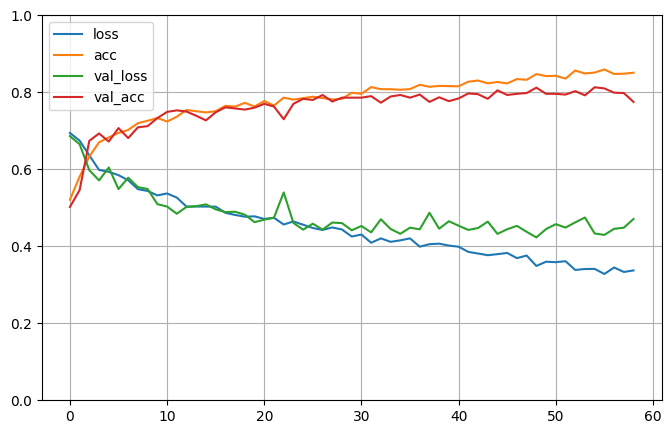

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
# model.save("cats_and_dogs")

In [1]:
!tensorboard --bind_all --logdir=./my_logs --port=6006

/bin/bash: /home/kailash/anaconda3/envs/tensorflow1/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2022-09-20 18:51:49.912879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 18:51:50.242757: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 18:51:51.026071: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64: